<a href="https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/mnist_digits_classification_dense_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of MNIST digits with dense layers

## Loading the image data

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

mnist = tf.keras.datasets.mnist

train_data, test_data = mnist.load_data()

train_images_original, train_labels_original = train_data
test_images_original, test_labels_original = test_data

TensorFlow 2.x selected.


## Preparing the image data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Preparing the labels

We need to categorically encode the labels.

In [0]:
train_labels = tf.keras.utils.to_categorical(train_labels_original)
test_labels = tf.keras.utils.to_categorical(test_labels_original)

## Deplaying some of the original and prepared image data and labels

In [0]:
train_images.shape

(60000, 784)

In [0]:
train_images_original.shape

(60000, 28, 28)

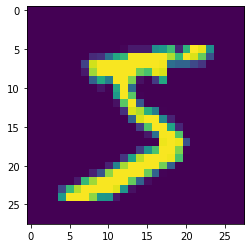

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images_original[0])
plt.show()

In [0]:
train_labels.shape

(60000, 10)

In [0]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
import numpy as np

In [0]:
np.argmax(train_labels[0])

5

In [0]:
train_labels_original[0]

5

## The network architecture

In [0]:
# define sequential model
network = tf.keras.models.Sequential()
# add two layers to model
network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## The compilation step

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## The training step

In [0]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2553 - accuracy: 0.9267 - val_loss: 0.1188 - val_accuracy: 0.9659
Epoch 2/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1031 - accuracy: 0.9696 - val_loss: 0.1032 - val_accuracy: 0.9689
Epoch 3/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0676 - accuracy: 0.9799 - val_loss: 0.0774 - val_accuracy: 0.9759
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0720 - val_accuracy: 0.9779
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0368 - accuracy: 0.9890 - val_loss: 0.0789 - val_accuracy: 0.9766
Epoch 6/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0286 - accuracy: 0.9916 - val_loss: 0.0662 - val_accuracy: 0.9802
Epoch 7/10
60000/60000 [==============================] 

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

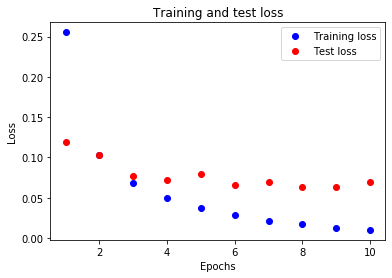

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']

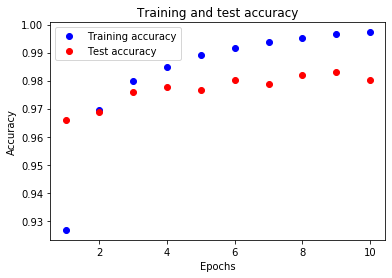

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Overfitting

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That's what you would expect when gradient descent optimization - the quantity you're trying to minimize should be less with every iteration.

But this isn't the case for the test loss and test accuracy: they seem to peak at the 4th or 6th epoch.

This is an example of overfitting: a model that performs better on the training data isn't necessarily a model that performs better on data it has never seen before. You are overoptimizing on the training data, and you end up learning representations that are specific to the training data and don't generalize to data outside the training set.

## Showing some misclassified digits

In [0]:
predictions = network.predict(test_images)

In [0]:
predictions[0]

array([9.4721807e-11, 1.7402691e-12, 6.3987400e-08, 1.8356682e-04,
       7.5973270e-16, 6.1358016e-09, 5.0776301e-19, 9.9981624e-01,
       3.2418681e-09, 1.3210635e-07], dtype=float32)

In [0]:
np.argmax(predictions[0])

7

In [0]:
test_labels_original[0]

7

In [0]:
predicted_labels = np.argmax(predictions, axis=1) 
predicted_labels = predicted_labels.astype('uint8')

In [0]:
predicted_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
wrong_indices = [i for i in range(10000) if predicted_labels[i] != test_labels_original[i]]

In [0]:
# The quantity below is equal to the test accuracy reported by the network fit method.
1.0 - len(wrong_indices) / 10000.0

0.9803

In [0]:
# This show the ith misclassified digit. 
i = 4
wrong_index = wrong_indices[i]  

In [0]:
predicted_labels[wrong_index]

7

In [0]:
test_labels_original[wrong_index]

2

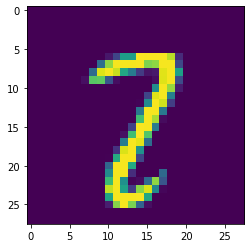

In [0]:
plt.imshow(test_images_original[wrong_index])
plt.show()